### Linear regression algorithm built from scratch

In [14]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt
import numpy as np

#### Creating dummy data

In [10]:
X, y = datasets.make_regression(n_samples=150, n_features=1,
                               noise=20, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

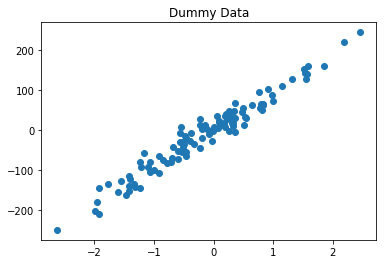

In [59]:
plt.scatter(X_train, y_train)
plt.title("Dummy Data")
plt.show()

#### Model

In [32]:
class LinearRegression:
    def __init__(self, lr = 0.001, n_iters = 10000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None 
        
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Gradient descent 
        for i in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias

            # Find gradient 
            dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
            db = (1/n_samples) * np.sum(y_pred - y)
            
            # Update weights and bias 
            self.weights -= self.lr * dw 
            self.bias -= self.lr * db
            
    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred
        

In [33]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

#### Testing the model

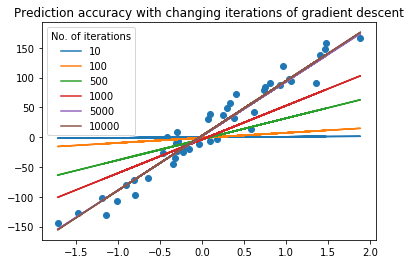

In [63]:
plt.scatter(X_test, y_test)
for it in [10, 100, 500, 1000, 5000, 10000]:
    lin_reg = LinearRegression(n_iters = it)
    lin_reg.fit(X_train, y_train)
    y_pred = lin_reg.predict(X_test)
    plt.plot(X_test, y_pred, label = it)
plt.legend(title = "No. of iterations")
plt.title("Prediction accuracy with changing iterations of gradient descent")
plt.show()

It can be seen that with an increased number of iterations, the model tends towards a more accuracy line of best fit.